In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cifar10 = keras.datasets.cifar10
epochs = 100

In [5]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
train_labels.shape

(50000, 1)

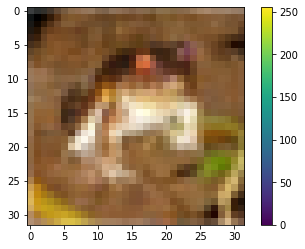

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255.0
test_images /= 255.0

In [12]:
train_labels = np.ndarray.flatten(train_labels)
test_labels = np.ndarray.flatten(test_labels)

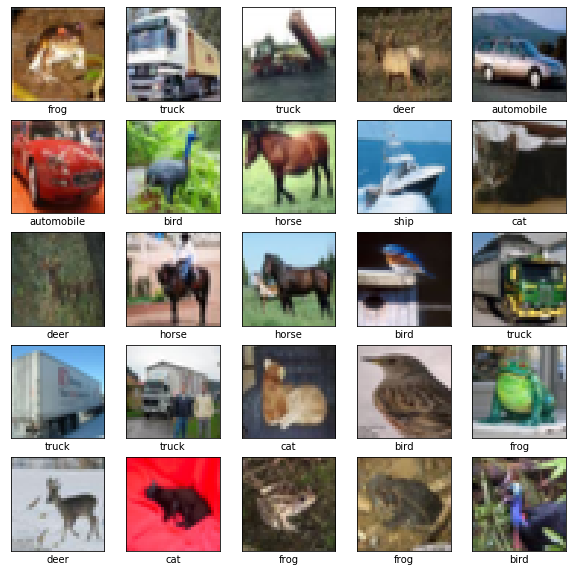

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=100)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 192us/sample - loss: 1.8752 - accuracy: 0.3324
Epoch 2/100
50000/50000 [==============================] - 7s 145us/sample - loss: 1.7085 - accuracy: 0.3994
Epoch 3/100
50000/50000 [==============================] - 9s 171us/sample - loss: 1.6342 - accuracy: 0.4244
Epoch 4/100
50000/50000 [==============================] - 13s 257us/sample - loss: 1.5867 - accuracy: 0.4419
Epoch 5/100
50000/50000 [==============================] - 12s 233us/sample - loss: 1.5432 - accuracy: 0.4573
Epoch 6/100
50000/50000 [==============================] - 10s 195us/sample - loss: 1.5118 - accuracy: 0.4703
Epoch 7/100
50000/50000 [==============================] - 9s 172us/sample - loss: 1.4838 - accuracy: 0.4783
Epoch 8/100
50000/50000 [==============================] - 6s 119us/sample - loss: 1.4592 - accuracy: 0.4879
Epoch 9/100
50000/50000 [==============================] - 9s 172us/sample - loss: 1.4386 - accuracy:

50000/50000 [==============================] - 7s 135us/sample - loss: 0.9360 - accuracy: 0.6732
Epoch 76/100
50000/50000 [==============================] - 6s 116us/sample - loss: 0.9330 - accuracy: 0.6714
Epoch 77/100
50000/50000 [==============================] - 7s 140us/sample - loss: 0.9293 - accuracy: 0.6709
Epoch 78/100
50000/50000 [==============================] - 6s 126us/sample - loss: 0.9207 - accuracy: 0.6765
Epoch 79/100
50000/50000 [==============================] - 8s 169us/sample - loss: 0.9232 - accuracy: 0.6772
Epoch 80/100
50000/50000 [==============================] - 9s 172us/sample - loss: 0.9120 - accuracy: 0.6813
Epoch 81/100
50000/50000 [==============================] - 7s 139us/sample - loss: 0.9102 - accuracy: 0.6811
Epoch 82/100
50000/50000 [==============================] - 6s 118us/sample - loss: 0.9052 - accuracy: 0.6831
Epoch 83/100
50000/50000 [==============================] - 6s 111us/sample - loss: 0.9030 - accuracy: 0.6835
Epoch 84/100
50000/5000

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 1.3944 - accuracy: 0.5115

Test accuracy: 0.5115


In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([1.5200145e-03, 2.0189906e-04, 7.3654845e-02, 8.7890983e-01,
       9.3544694e-03, 3.5602935e-02, 3.7348425e-05, 3.4628242e-06,
       5.7106564e-04, 1.4420559e-04], dtype=float32)

In [20]:
np.argmax(predictions[0])

3

In [21]:
test_labels[0]

3

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("Prediction : {} {:2.0f}% \nTrue : {}".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]), color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

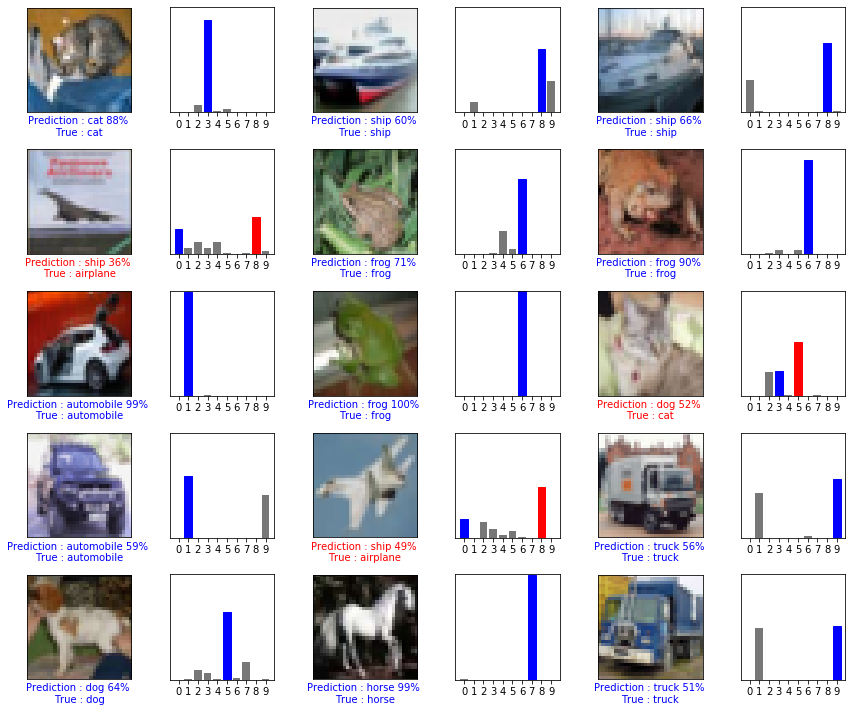

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()